# WeatherPy
Note:
----

The api call is said to have a maximum of 60 calls per minute. However, this has proven to vary apparently based on the time of day and the number of concurrent calls accross the internet at that time. For this reason, I converted the output of the API to a dataframe and saved the data to a file, output.csv. To continue running without having to rely on the timing of the API, the program reads from the csv file. The temperatures are in degrees Kelvin. Kelvin temperatures can be converted to Farenheit temperature with the fomula x=Kelvin_temp * (9/5) -459.67.  The output csv is saved without this conversion function to keep the data the same as the oringinal output from the api. I chose not to take the absolute value of the latitude because it is not clear if the northern and southern latitudes have the same effect on temp, etc. 


In [66]:
# Dependencies and Setup
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import json
response_list=[]
# Import API key
from api_keys import api_key
#this makes sure that the program  reads the api_key from the api_keys.py file
print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

f38803eb219d76630a1a1fd8c76399c3


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        


# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
def get_current_weather(city, api_key):
    
    api_url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q": city
    }
    resp = requests.get(api_url, params=payload)
    
    if resp.status_code == 200:
        return resp.json()
    else:
        return None

all_cities=[]
df=[]
    
cities_list_df = pd.DataFrame(cities)



for city in cities:
    result = get_current_weather(city, api_key)
    if result:
        all_cities.append(result)

    

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
import datetime
print(all_cities)
city_weather_df=pd.DataFrame([{
    "name": df["name"],
    "temp": df["main"]["temp"],
    "temp_min": df["main"]["temp_min"],
    "temp_max": df["main"]["temp_max"],
    "lon": df['coord']['lon'],
    "lat": df['coord']['lat'],
    "speed": df['wind']['speed'],
    "humidity": df['main']['humidity'],
    "clouds": df['clouds']['all']
} for df in all_cities])

city_weather_df['this_date']=datetime.date.today()

city_weather_df.to_csv("output3.csv")


[{'coord': {'lon': -48.67, 'lat': -28.24}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.15, 'feels_like': 301.04, 'temp_min': 301.15, 'temp_max': 301.15, 'pressure': 1012, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 350}, 'clouds': {'all': 63}, 'dt': 1577713376, 'sys': {'type': 1, 'id': 8360, 'country': 'BR', 'sunrise': 1577693972, 'sunset': 1577744059}, 'timezone': -10800, 'id': 3461370, 'name': 'Imbituba', 'cod': 200}, {'coord': {'lon': 149.07, 'lat': -23.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 295.1, 'feels_like': 294.35, 'temp_min': 295.1, 'temp_max': 295.1, 'pressure': 1013, 'humidity': 76, 'sea_level': 1013, 'grnd_level': 993}, 'wind': {'speed': 4.78, 'deg': 95}, 'clouds': {'all': 70}, 'dt': 1577713376, 'sys': {'country': 'AU', 'sunrise': 1577647112, 'sunset': 1577695973}, 'timezone

In [1]:
"""This is where to start the program to avoid having to call the API again."""

import matplotlib.pyplot as plt
import pandas as pd
city_weather_csv_df=pd.read_csv('output3.csv')

city_weather_csv_df


,Unnamed: 0,name,temp,temp_min,temp_max,lon,lat,speed,humidity,clouds,this_date
0,0,Imbituba,301.15,301.15,301.15,-48.67,-28.24,6.70,69,63,2019-12-30
1,1,Bluff,295.10,295.10,295.10,149.07,-23.58,4.78,76,70,2019-12-30
2,2,Port Alfred,296.48,296.48,296.48,26.89,-33.59,0.89,81,22,2019-12-30
3,3,Ushuaia,286.04,285.15,287.15,-68.31,-54.81,5.10,33,20,2019-12-30
4,4,Vaini,297.15,297.15,297.15,74.49,15.34,4.10,69,40,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...
568,568,Hay River,255.15,255.15,255.15,-115.79,60.82,4.60,77,90,2019-12-30
569,569,Cockburn Town,298.68,298.68,298.68,-71.14,21.46,7.95,78,0,2019-12-30
570,570,Thoen,293.16,293.16,293.16,99.22,17.61,1.39,80,36,2019-12-30
571,571,Richards Bay,298.16,298.16,298.16,32.06,-28.77,10.48,82,0,2019-12-30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

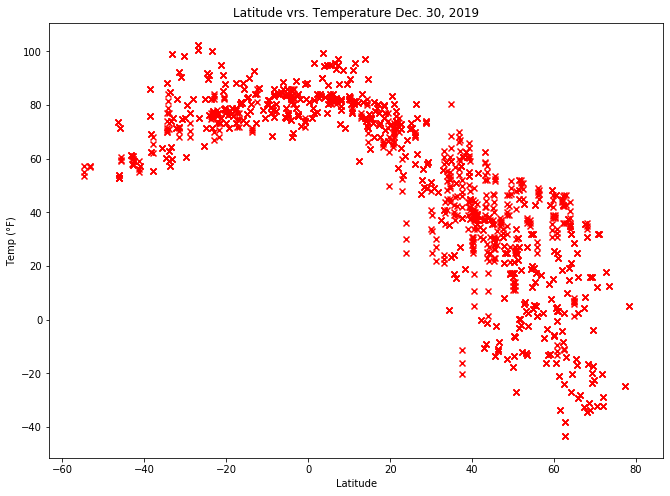

In [28]:
from pylab import rcParams

lat_vrs_temp_df1=city_weather_csv_df[['lat', 'temp', 'temp_min', 'temp_max', 'this_date']]

#I used function k_to_f to turn Kelvin temperature to Farenheit temperature for each of the temperature columns.

lat_vrs_temp_df = lat_vrs_temp_df1.apply(lambda x: 9/5*x-459.67 if (x.name == 'temp_min') | 
                              (x.name == 'temp') | 
                              (x.name == 'temp_max') 
                              else x)

x = lat_vrs_temp_df['lat']

y1 = lat_vrs_temp_df['temp_min']

y2 = lat_vrs_temp_df['temp']

y3 = lat_vrs_temp_df['temp_max']




lat_vrs_temp_df['this_date'] = pd.to_datetime(lat_vrs_temp_df['this_date'])

the_date = lat_vrs_temp_df['this_date'].dt.strftime("%b. %d, %Y").unique()

#Referring to the first item in a list ensures that the date is not in brackets.
the_date2 = the_date[0]








the_title="Latitude vrs. Temperature " + the_date2
plt.scatter(x, y1, color = 'r', marker = 'x' )
plt.scatter(x, y3, color = 'r', marker = 'x')
plt.scatter(x, y2, color = 'r', marker = 'x' )
plt.title(the_title)
plt.xlabel("Latitude")
#The code below adds the degrees Fahrenheit symbol
plt.ylabel(u'Temp (\u00B0F)')
fig = plt.gcf() 
fig.set_size_inches(11,8)
plt.show()




#### Latitude vs. Humidity Plot

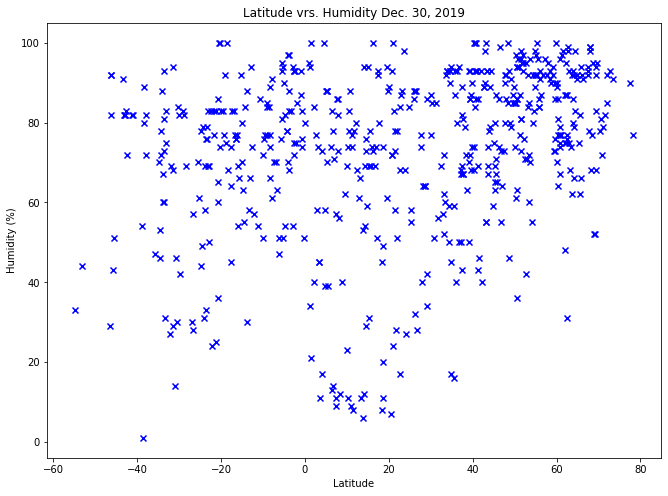

In [29]:
lat_vrs_humidity_df = city_weather_csv_df[['lat', 'humidity']]
lat_vrs_humidity_df





x = lat_vrs_humidity_df['lat']
y = lat_vrs_humidity_df['humidity']

the_title="Latitude vrs. Humidity "
the_y_label="Humidity (%)"
the_title = the_title + the_date2
                      
plt.scatter(x, y, color = 'b', marker = 'x' )
plt.title(the_title)
plt.xlabel("Latitude")
plt.ylabel(the_y_label)
fig = plt.gcf() 
fig.set_size_inches(11,8)

plt.show()






#### Latitude vs. Cloudiness Plot

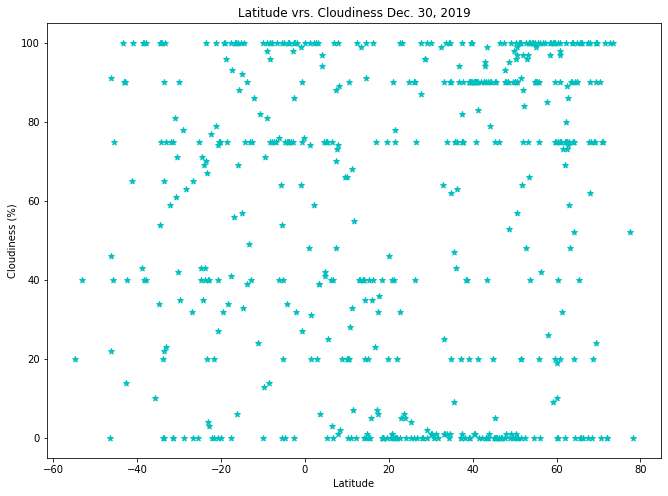

In [30]:
lat_vrs_cloudiness_df = city_weather_csv_df[['lat', 'clouds']]
lat_vrs_cloudiness_df

x = lat_vrs_cloudiness_df['lat']
y = lat_vrs_cloudiness_df['clouds']

plt.scatter(x, y, color = 'c', marker = '*' )
plt.title("Latitude vrs. Cloudiness " + the_date2)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
fig = plt.gcf() 
fig.set_size_inches(11,8)

plt.show()

#### Latitude vs. Wind Speed Plot

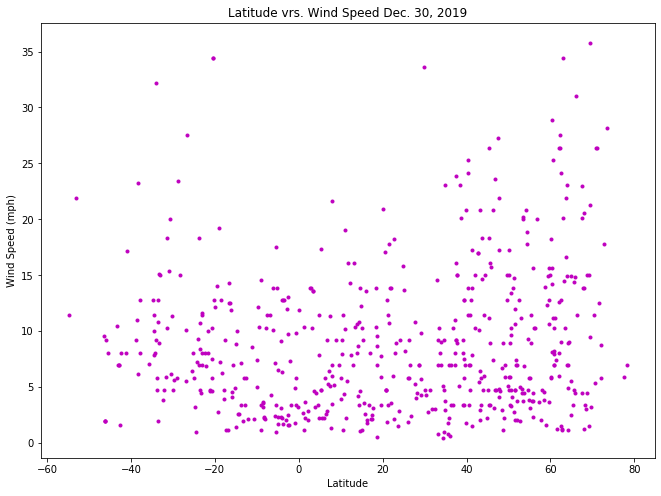

In [31]:
lat_vrs_wind_speed_df1 =  city_weather_csv_df[['lat', 'speed']]

#Lambda function converts wind speed from meters/second to miles/hour
lat_vrs_wind_speed_df = lat_vrs_wind_speed_df1.apply(lambda x: x*2.237 if x.name == 'speed' else x)

x = lat_vrs_wind_speed_df['lat']
y = lat_vrs_wind_speed_df['speed']
plt.title("Latitude vrs. Wind Speed " + the_date2)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.scatter(x, y, color = 'm', marker = '.' )
fig = plt.gcf() 
fig.set_size_inches(11,8)
plt.show()